In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [3]:
df=pd.read_csv('wine.csv')

In [5]:
df.shape

(178, 14)

In [9]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [15]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
# Drop label column if exists 
features = df.drop(columns=['Type'])

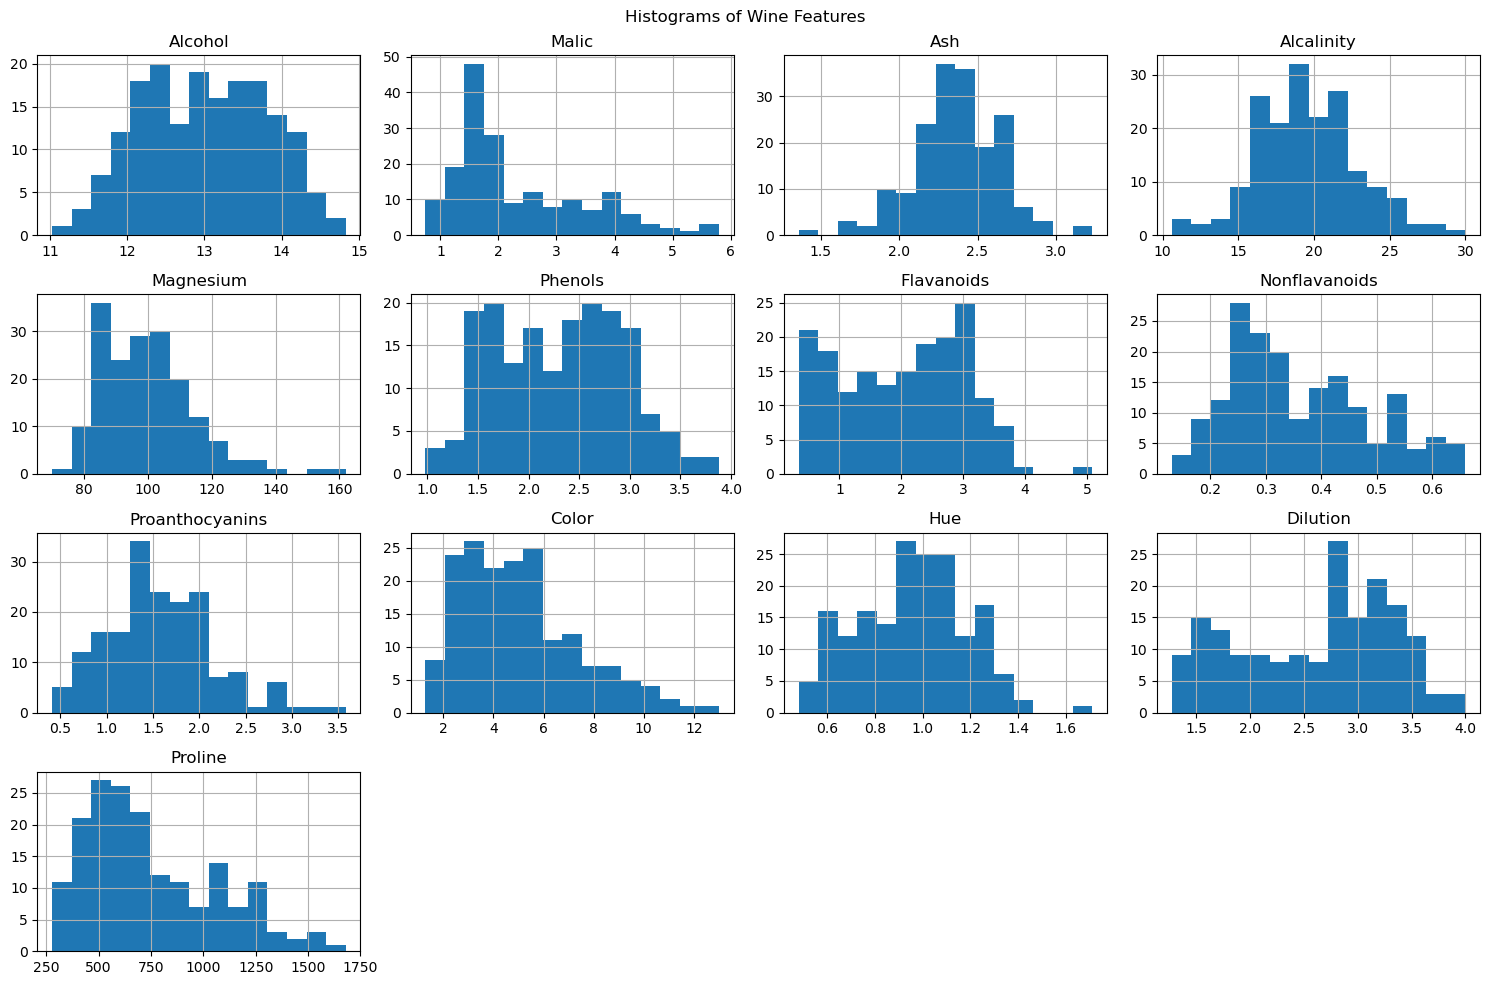

In [21]:
# Histograms
features.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Wine Features")
plt.tight_layout()
plt.show()

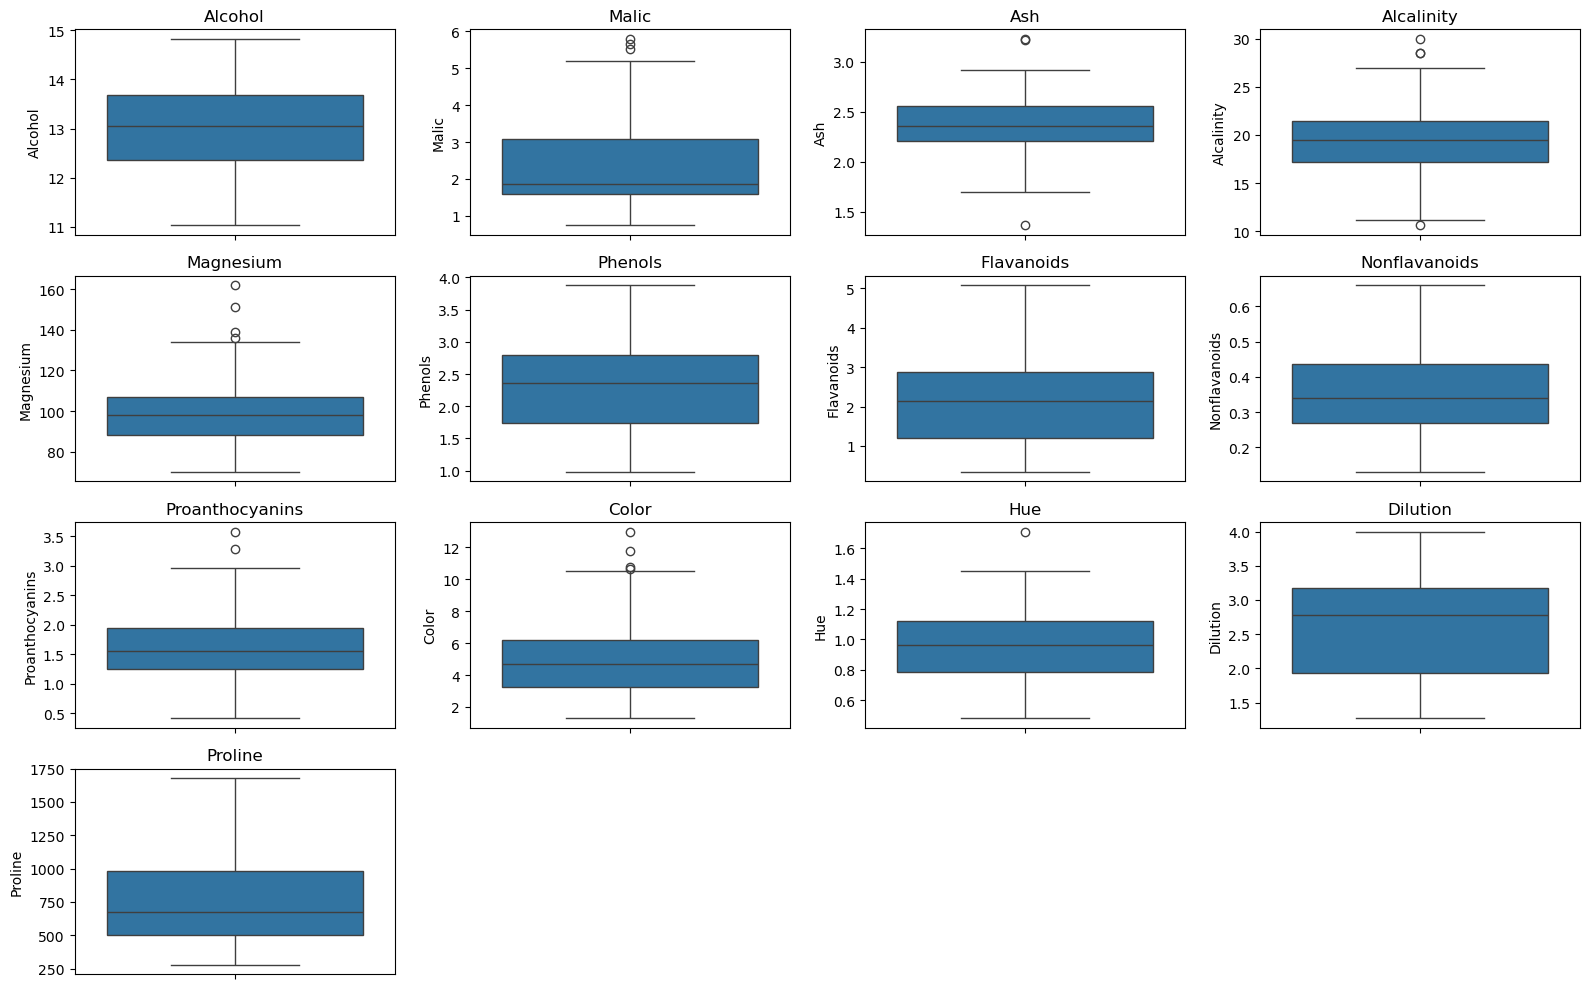

In [23]:
# Box Plots
plt.figure(figsize=(16, 10))
for i, col in enumerate(features.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=features[col])
    plt.title(col)
plt.tight_layout()
plt.show()

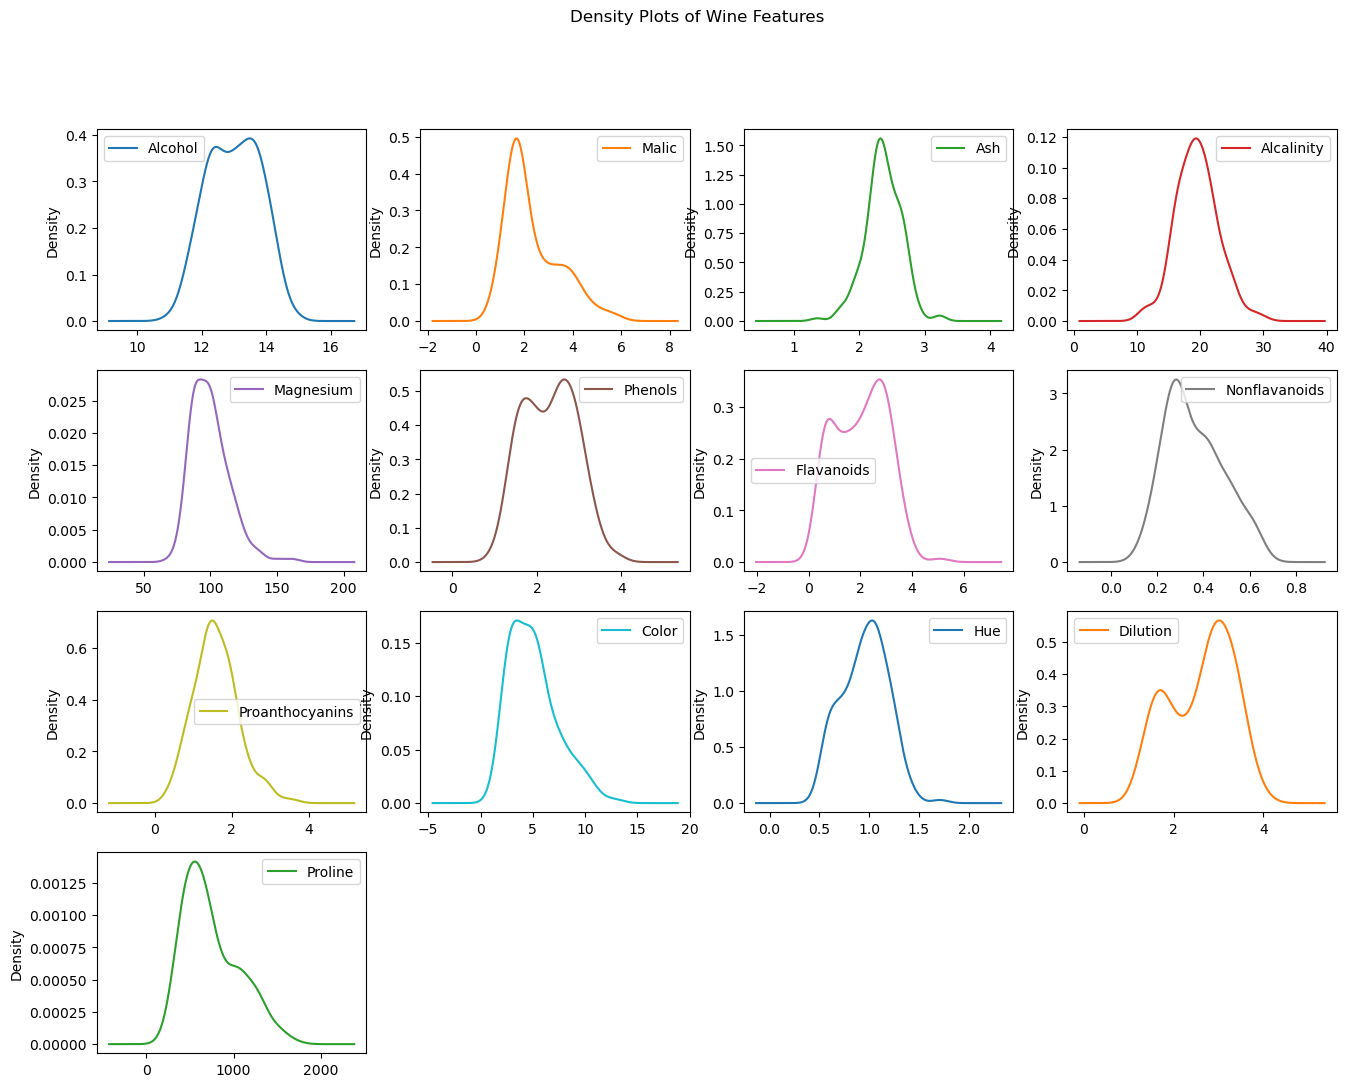

In [25]:
# Density Plots
features.plot(kind='density', subplots=True, layout=(4, 4), figsize=(16, 12), sharex=False)
plt.suptitle("Density Plots of Wine Features")
plt.show()


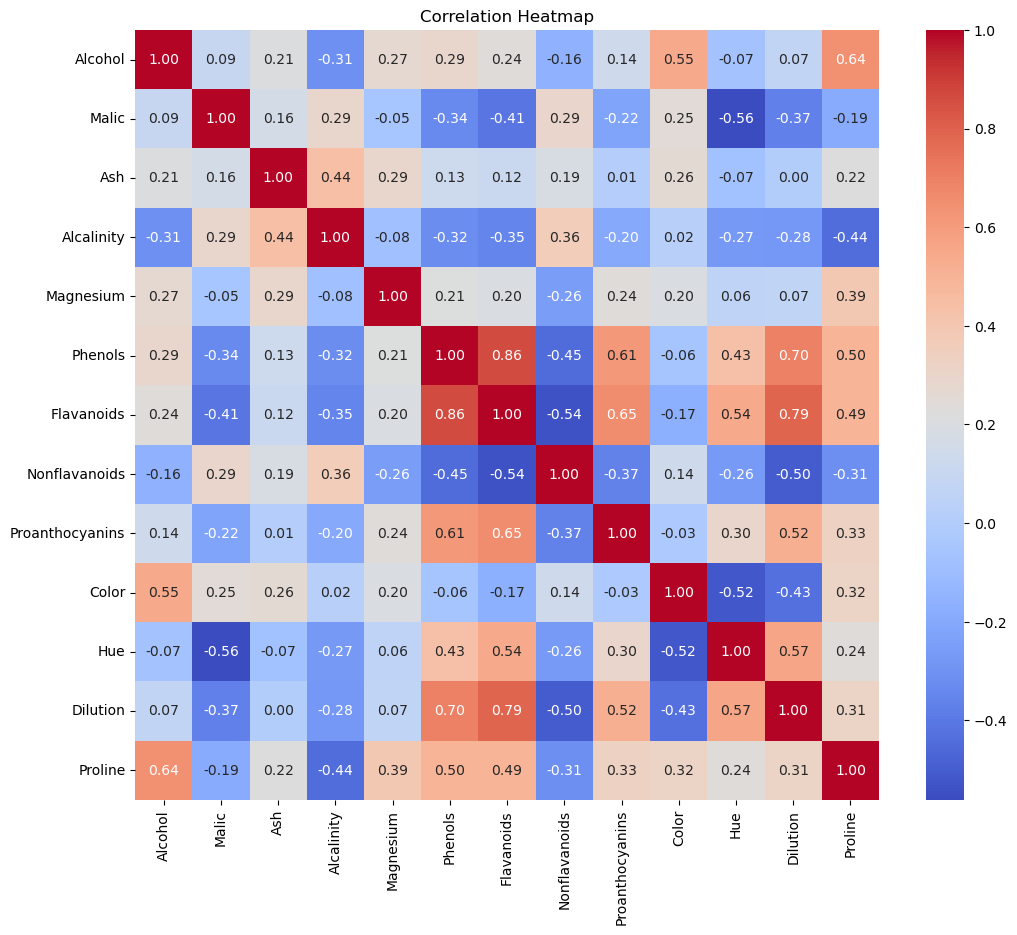

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler

In [37]:
X = df.drop(columns=['Type'])

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [51]:
# Scree Plot
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

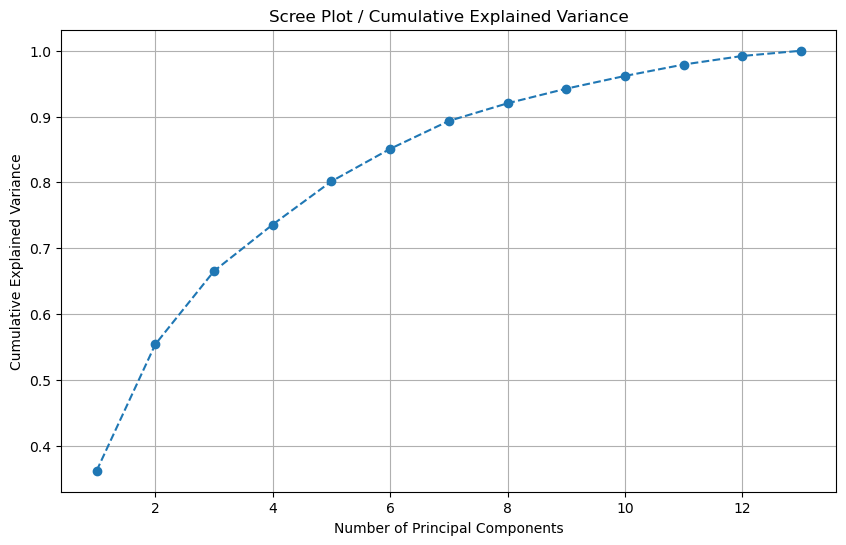

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot / Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [55]:
# Re-run PCA with 9 components
pca = PCA(n_components=9)
X_pca_9 = pca.fit_transform(X_scaled)

# Save PCA-transformed data to a DataFrame (optional)
df_pca = pd.DataFrame(X_pca_9, columns=[f'PC{i+1}' for i in range(9)])

In [59]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819


In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [71]:
inertia = []
k_range = range(2, 11)

In [73]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

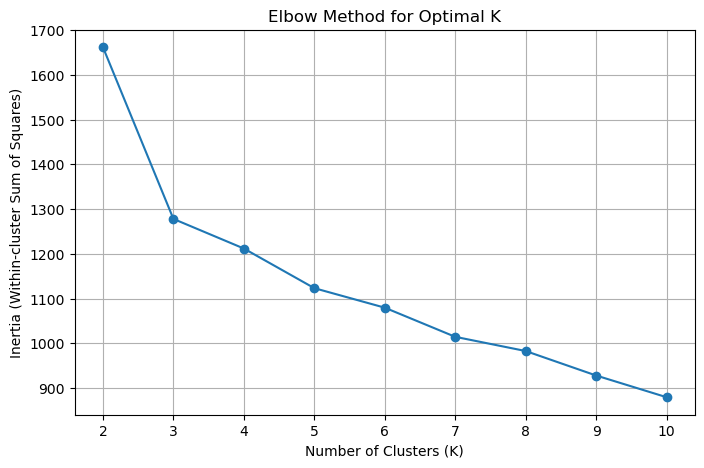

In [75]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [95]:
# Fit with chosen K 
kmeans = KMeans(n_clusters=3, random_state=42)
original_labels = kmeans.fit_predict(X_scaled)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [97]:
df['KMeans_Original_Cluster'] = original_labels


In [99]:
# Evaluation metrics
sil_score = silhouette_score(X_scaled, original_labels)
db_score = davies_bouldin_score(X_scaled, original_labels)

In [101]:
print(f"Silhouette Score (Original Data): {sil_score:.3f}")
print(f"Davies-Bouldin Index (Original Data): {db_score:.3f}")

Silhouette Score (Original Data): 0.285
Davies-Bouldin Index (Original Data): 1.389


In [103]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

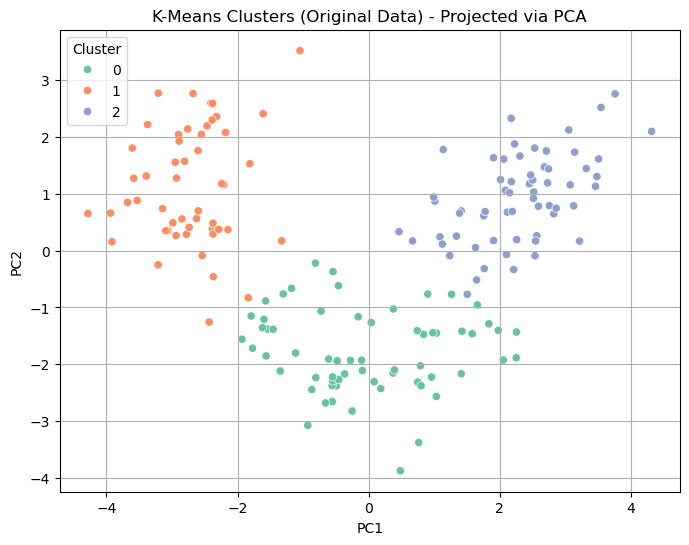

In [105]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=original_labels, palette='Set2')
plt.title("K-Means Clusters (Original Data) - Projected via PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [107]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_labels = kmeans_pca.fit_predict(X_pca_9)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [109]:
df['KMeans_PCA_Cluster'] = pca_labels


In [111]:
sil_pca = silhouette_score(X_pca_9, pca_labels)
db_pca = davies_bouldin_score(X_pca_9, pca_labels)

print(f"Silhouette Score (PCA Data): {sil_pca:.3f}")
print(f"Davies-Bouldin Index (PCA Data): {db_pca:.3f}")

Silhouette Score (PCA Data): 0.306
Davies-Bouldin Index (PCA Data): 1.304


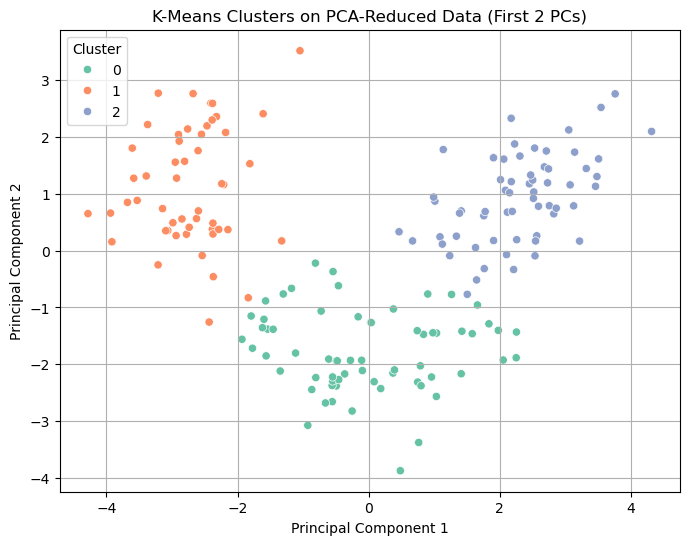

In [113]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_9[:, 0], y=X_pca_9[:, 1], hue=pca_labels, palette='Set2')
plt.title("K-Means Clusters on PCA-Reduced Data (First 2 PCs)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [117]:
print(f"Original Data - Silhouette Score: {sil_score:.3f}")
print(f"Original Data - Davies-Bouldin Index: {db_score:.3f}")

print(f"PCA Data - Silhouette Score: {sil_pca:.3f}")
print(f"PCA Data - Davies-Bouldin Index: {db_pca:.3f}")

Original Data - Silhouette Score: 0.285
Original Data - Davies-Bouldin Index: 1.389
PCA Data - Silhouette Score: 0.306
PCA Data - Davies-Bouldin Index: 1.304


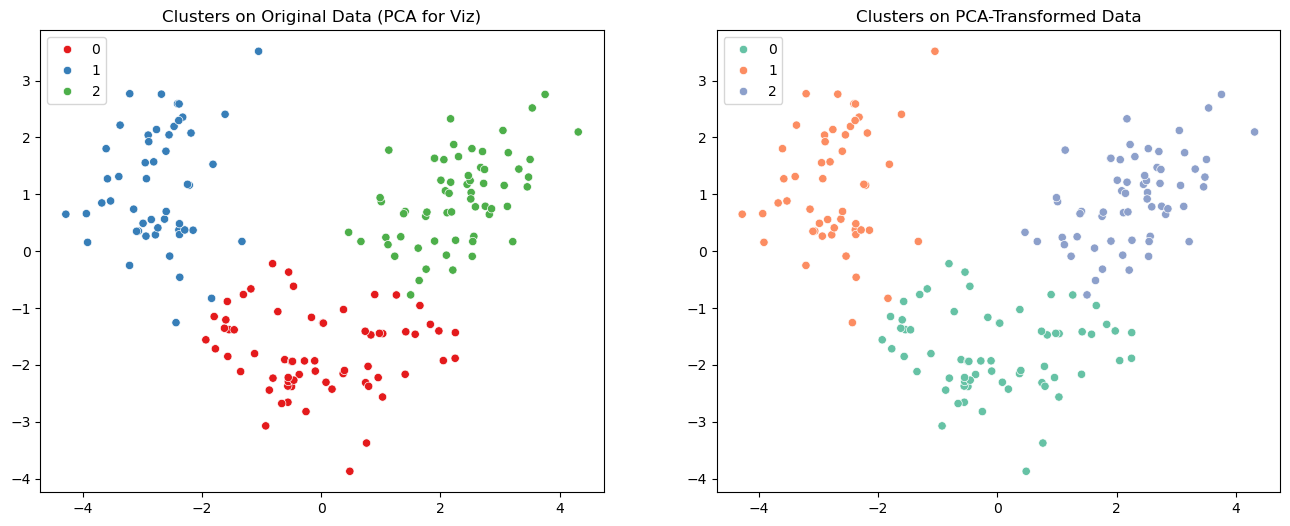

In [121]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Original Data (PCA for 2D visualization only)
X_scaled_2d = PCA(n_components=2).fit_transform(X_scaled)
sns.scatterplot(x=X_scaled_2d[:, 0], y=X_scaled_2d[:, 1], hue=original_labels, palette='Set1', ax=ax[0])
ax[0].set_title("Clusters on Original Data (PCA for Viz)")

# PCA Data
sns.scatterplot(x=X_pca_9[:, 0], y=X_pca_9[:, 1], hue=pca_labels, palette='Set2', ax=ax[1])
ax[1].set_title("Clusters on PCA-Transformed Data")

plt.show()